In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#importing operating system library
import os


In [4]:
#Check current working directory
os.getcwd()

'C:\\Users\\Jyoti\\Desktop\\Upgrad\\Linear Regression'

In [5]:
#Import Data
Bike=pd.read_csv("day.csv")

In [6]:
#Check imported dataframe
Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
# Check the descriptive information
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [11]:
# Check the shape of df

Bike.shape

(730, 16)

In [12]:
#Observation: There are 730 rows and 16 columns

## Data Quality and Sanity check

In [13]:
#Checking missing values
# percentage of missing values in each column
round(100*(Bike.isnull().sum()/len(Bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#Observations: There are no missing values in the dataframe

In [15]:
#Checking Duplicate values
Bike_dup = Bike.copy()

# Checking for duplicates and dropping the entire duplicate row if any
Bike_dup.drop_duplicates(subset=None, inplace=True)

In [17]:
Bike_dup.shape

(730, 16)

Observations: There are no duplicate values


### Removing redundant & irrelevant columns

In [18]:
Bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [19]:
Bike_new=Bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

In [20]:
Bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Creating Dummy Variables

In [21]:
# Check the datatypes 
Bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [22]:
# Convert to 'category' data type

Bike_new['season']=Bike_new['season'].astype('category')
Bike_new['weathersit']=Bike_new['weathersit'].astype('category')
Bike_new['mnth']=Bike_new['mnth'].astype('category')
Bike_new['weekday']=Bike_new['weekday'].astype('category')

C:\Users\Jyoti\AppData\Local\Temp\ipykernel_8596\2076533197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bike_new['season']=Bike_new['season'].astype('category')
C:\Users\Jyoti\AppData\Local\Temp\ipykernel_8596\2076533197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bike_new['weathersit']=Bike_new['weathersit'].astype('category')
C:\Users\Jyoti\AppData\Local\Temp\ipykernel_8596\2076533197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [23]:
Bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


# This code does 3 things:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.


In [25]:

Bike_new = pd.get_dummies(Bike_new, drop_first=True)
Bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [26]:
Bike_new.shape

(730, 30)

# Splitting data into Train and Test

->Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)


->We will use train_test_split method from sklearn package for this

In [27]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(Bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

In [28]:
#Check the tran dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [29]:
#Check test dataset
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null   

## Exploratory Data Analysis

Visualising Numeric Variables

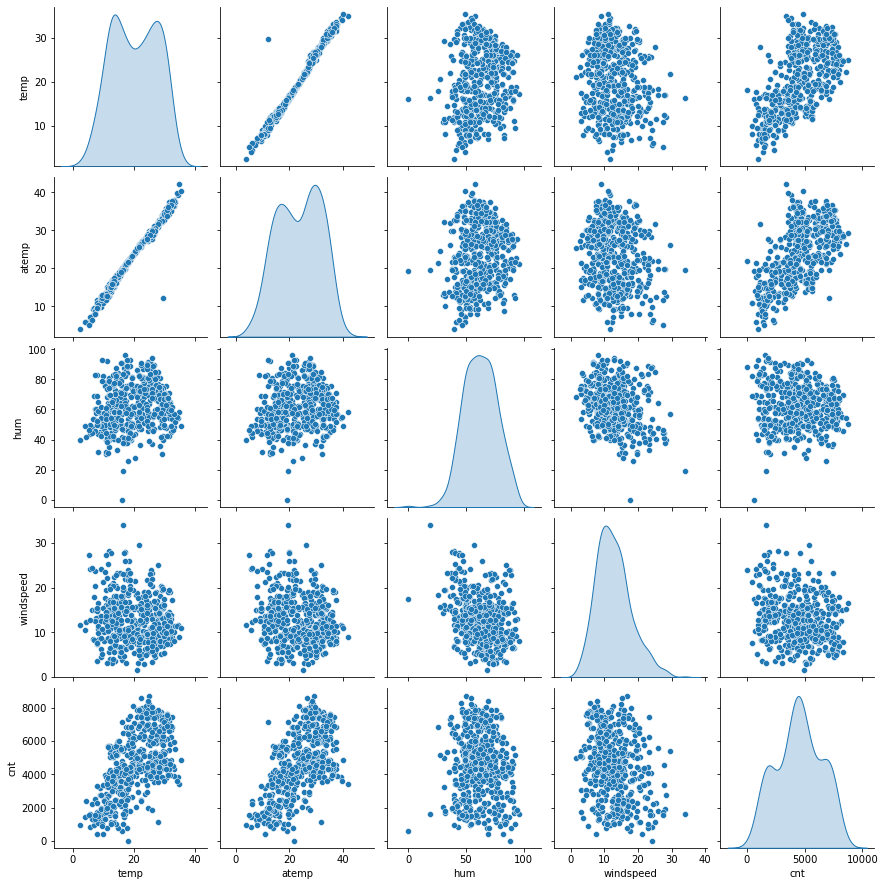

In [31]:
 #Create a new dataframe of only numeric variables:

bike_num=df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

Observation :The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

### Visualising Catagorical Variables

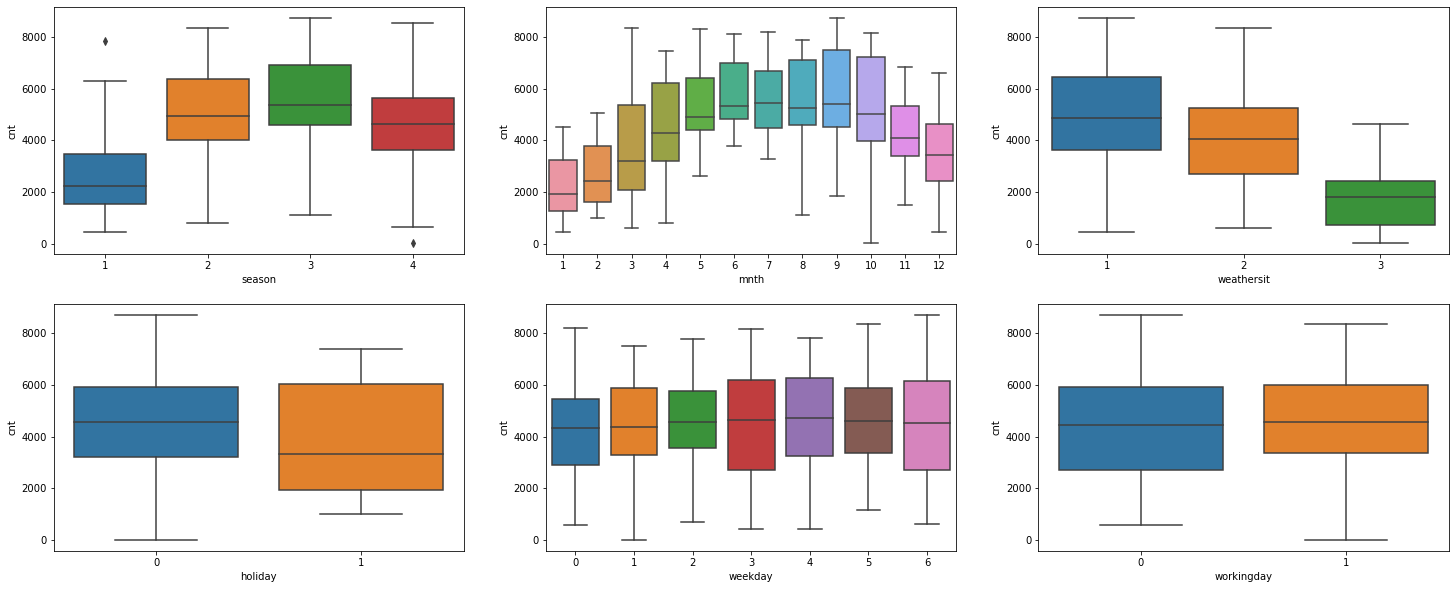

In [33]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike)
plt.show()

Observations:

There were 6 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

### Correlation Matrix

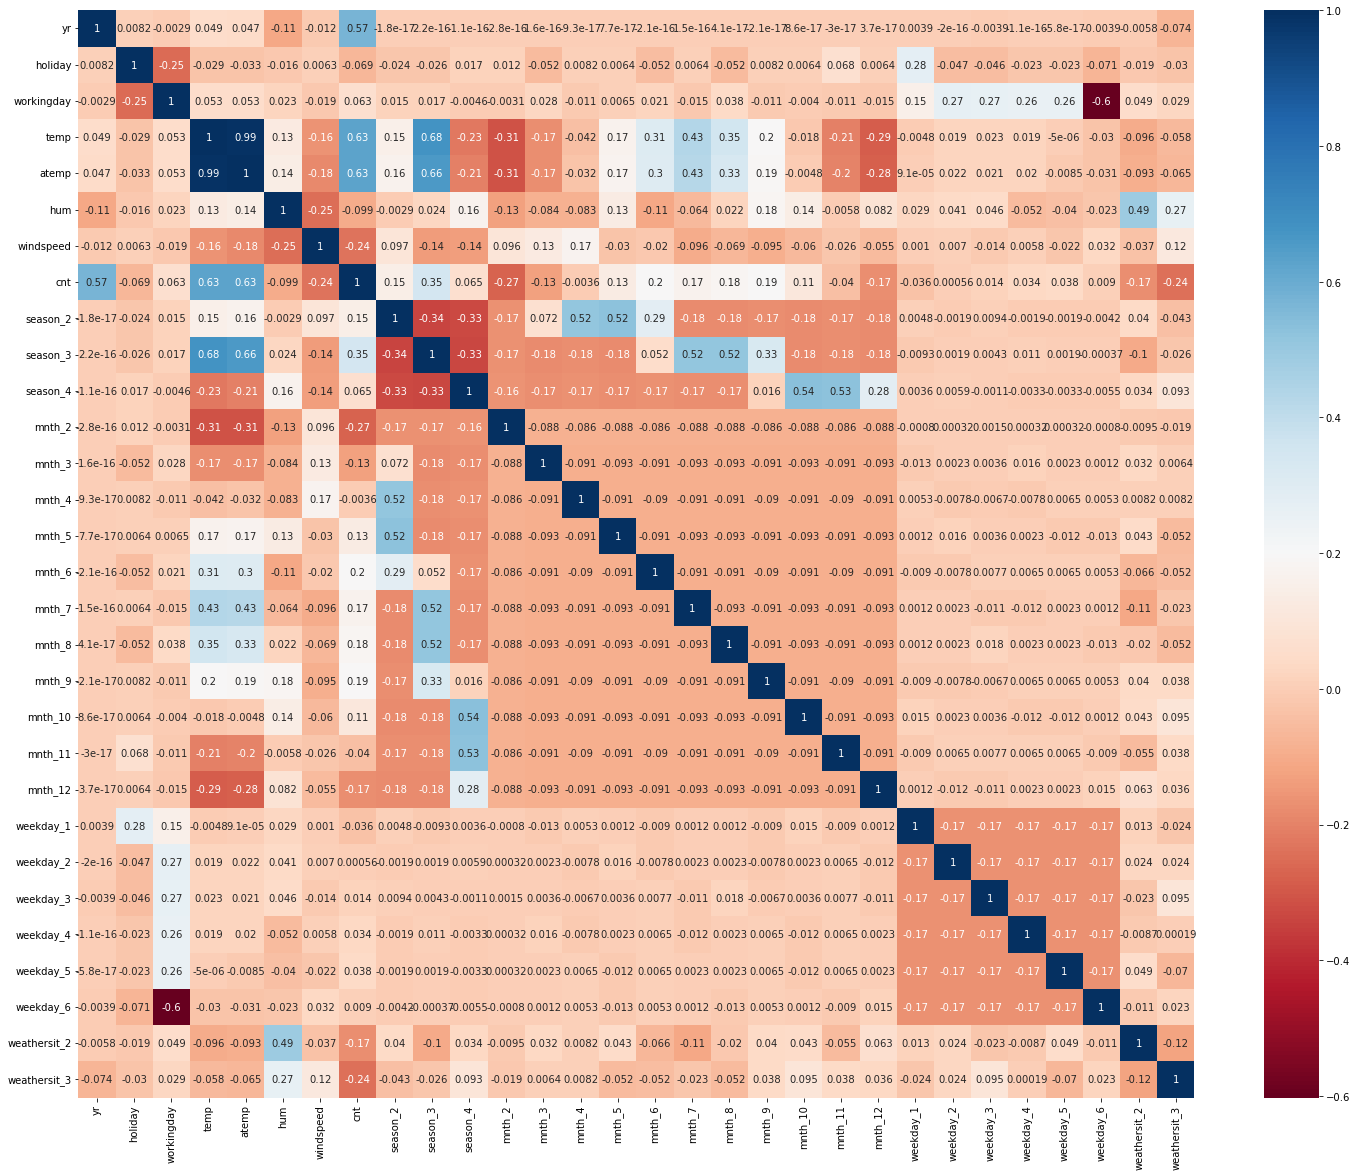

In [36]:
plt.figure(figsize = (25,20))
sns.heatmap(Bike_new.corr(), annot = True, cmap="RdBu")
plt.show()

Observation

The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.

We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

### Rescaling Features

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [42]:
# Checking values after scaling
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model development

In [44]:
y_train = df_train.pop('cnt')
X_train = df_train

RFE
Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [45]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

### Multicolinearity check with VIF 

In [53]:
 #Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Jyoti\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
24,weekday_4,inf
22,weekday_2,inf
2,workingday,inf
23,weekday_3,inf
1,holiday,inf
25,weekday_5,inf
21,weekday_1,inf
3,temp,434.95
4,atemp,378.25
5,hum,21.80


In [55]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [56]:
# Check the parameters obtained

lr1.params

const           0.194683
yr              0.230001
holiday         0.002208
workingday      0.031904
temp            0.352402
atemp           0.103142
hum            -0.171527
windspeed      -0.180411
season_2        0.102085
season_3        0.090599
season_4        0.179040
mnth_2          0.015681
mnth_3          0.067213
mnth_4          0.037187
mnth_5          0.064938
mnth_6          0.042440
mnth_7          0.000700
mnth_8          0.029100
mnth_9          0.107261
mnth_10         0.045564
mnth_11        -0.021877
mnth_12        -0.012952
weekday_1      -0.016644
weekday_2       0.003178
weekday_3       0.016921
weekday_4       0.012838
weekday_5       0.017819
weekday_6       0.053802
weathersit_2   -0.049620
weathersit_3   -0.270104
dtype: float64

In [57]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     94.71
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          4.67e-176
Time:                        23:36:16   Log-Likelihood:                 517.04
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     481   BIC:                            -853.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1947      0.032      6.178   

### Model 2

Removing the variable 'atemp' based on its High p-value & High VIF

In [58]:
X_train_new = X_train.drop(["atemp"], axis = 1)

In [59]:
#VIF Check

In [60]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Jyoti\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
23,weekday_4,inf
1,holiday,inf
2,workingday,inf
22,weekday_3,inf
21,weekday_2,inf
20,weekday_1,inf
24,weekday_5,inf
3,temp,45.06
4,hum,21.66
7,season_3,15.51


In [62]:
#Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [63]:
lr2.params

const           0.195890
yr              0.229931
holiday         0.001177
workingday      0.031978
temp            0.451782
hum            -0.170886
windspeed      -0.184784
season_2        0.102273
season_3        0.090103
season_4        0.179714
mnth_2          0.016248
mnth_3          0.067504
mnth_4          0.037864
mnth_5          0.064217
mnth_6          0.040991
mnth_7         -0.000741
mnth_8          0.026401
mnth_9          0.105873
mnth_10         0.045284
mnth_11        -0.021893
mnth_12        -0.012699
weekday_1      -0.016398
weekday_2       0.003112
weekday_3       0.016680
weekday_4       0.012780
weekday_5       0.016981
weekday_6       0.053817
weathersit_2   -0.049765
weathersit_3   -0.270868
dtype: float64

In [64]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     98.29
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          6.10e-177
Time:                        23:38:38   Log-Likelihood:                 516.75
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     482   BIC:                            -858.9
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1959      0.031      6.227   

### Model 3

Removing the variable 'hum' based on its Very High 'VIF' value.

In [65]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Jyoti\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
21,weekday_3,inf
1,holiday,inf
2,workingday,inf
20,weekday_2,inf
23,weekday_5,inf
19,weekday_1,inf
22,weekday_4,inf
3,temp,36.09
6,season_3,15.48
14,mnth_8,11.00


In [69]:
X_train_new = X_train_new.drop(["weekday_3"], axis = 1)

In [70]:
X_train_new = X_train_new.drop(["weekday_2"], axis = 1)

In [71]:
X_train_new = X_train_new.drop(["weekday_5"], axis = 1)

In [72]:
X_train_new = X_train_new.drop(["weekday_1"], axis = 1)

In [73]:
X_train_new = X_train_new.drop(["weekday_4"], axis = 1)

In [74]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [75]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [76]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [77]:
lr3.params

const           0.130452
yr              0.233896
temp            0.415119
windspeed      -0.153953
season_2        0.102963
season_3        0.097807
season_4        0.180251
mnth_2          0.020104
mnth_3          0.078650
mnth_4          0.042664
mnth_5          0.059959
mnth_6          0.056125
mnth_7          0.002675
mnth_8          0.029450
mnth_9          0.100200
mnth_10         0.038986
mnth_11        -0.023806
mnth_12        -0.023200
weekday_6       0.022105
weathersit_2   -0.075444
weathersit_3   -0.312689
dtype: float64

In [78]:
 #Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     121.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.50e-175
Time:                        23:44:07   Log-Likelihood:                 495.26
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     489   BIC:                            -859.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1305      0.021      6.098   

### Model4

In [80]:
X_train_new = X_train_new.drop(["season_2"], axis = 1)

In [81]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,32.42
3,season_4,7.03
10,mnth_8,6.20
9,mnth_7,5.80
12,mnth_10,5.31
2,windspeed,4.76
13,mnth_11,4.54
8,mnth_6,4.50
11,mnth_9,4.33
7,mnth_5,4.31


In [82]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [83]:
lr4.params

const           0.129910
yr              0.233881
temp            0.422321
windspeed      -0.156663
season_4        0.133015
mnth_2          0.019594
mnth_3          0.110639
mnth_4          0.143611
mnth_5          0.159430
mnth_6          0.153045
mnth_7          0.095593
mnth_8          0.122798
mnth_9          0.179738
mnth_10         0.083435
mnth_11         0.022106
mnth_12         0.004736
weekday_6       0.021118
weathersit_2   -0.074946
weathersit_3   -0.309175
dtype: float64

In [84]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     130.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.62e-174
Time:                        23:45:46   Log-Likelihood:                 487.33
No. Observations:                 510   AIC:                            -936.7
Df Residuals:                     491   BIC:                            -856.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1299      0.022      6.007   

### Model 5

In [85]:
X_train_new = X_train_new.drop(["temp"], axis = 1)

In [86]:
 #Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,season_4,7.03
1,windspeed,4.27
12,mnth_11,3.94
11,mnth_10,3.79
13,mnth_12,2.16
0,yr,1.96
15,weathersit_2,1.53
5,mnth_4,1.51
10,mnth_9,1.50
3,mnth_2,1.40


In [87]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [88]:
# Check the parameters obtained

lr5.params

const           0.221879
yr              0.243413
windspeed      -0.155139
season_4        0.134444
mnth_2          0.052596
mnth_3          0.182470
mnth_4          0.260279
mnth_5          0.347951
mnth_6          0.385270
mnth_7          0.364852
mnth_8          0.369742
mnth_9          0.375231
mnth_10         0.208826
mnth_11         0.083341
mnth_12         0.050028
weekday_6       0.014143
weathersit_2   -0.078240
weathersit_3   -0.315896
dtype: float64

In [89]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     114.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.04e-158
Time:                        23:47:49   Log-Likelihood:                 446.89
No. Observations:                 510   AIC:                            -857.8
Df Residuals:                     492   BIC:                            -781.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2219      0.021     10.703   

### Model 6

In [90]:
X_train_new = X_train_new.drop(["season_4"], axis = 1)

In [92]:
 #Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.26
0,yr,1.95
14,weathersit_2,1.53
4,mnth_4,1.51
2,mnth_2,1.40
3,mnth_3,1.40
11,mnth_11,1.36
5,mnth_5,1.34
8,mnth_8,1.34
9,mnth_9,1.29


In [93]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [95]:
# Check the parameters obtained

lr6.params
    

const           0.224778
yr              0.246234
windspeed      -0.164786
mnth_2          0.052816
mnth_3          0.182702
mnth_4          0.261341
mnth_5          0.346951
mnth_6          0.384637
mnth_7          0.364125
mnth_8          0.368766
mnth_9          0.412962
mnth_10         0.342723
mnth_11         0.217653
mnth_12         0.132036
weekday_6       0.009605
weathersit_2   -0.077292
weathersit_3   -0.326793
dtype: float64

In [96]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     112.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.62e-153
Time:                        23:50:37   Log-Likelihood:                 431.77
No. Observations:                 510   AIC:                            -829.5
Df Residuals:                     493   BIC:                            -757.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2248      0.021     10.541   

Observations:

This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number

### Final Model Interpretation

Hypothesis Testing:
Hypothesis testing states that:

H0:B1=B2=...=Bn=0
H1: at least one Bi!=0

lr6 model coefficient values

const            0.2248     
yr               0.2462     
windspeed       -0.1648     
mnth_2           0.0528     
mnth_3           0.1827     
mnth_4           0.2613     
mnth_5           0.3470     
mnth_6           0.3846     
mnth_7           0.3641     
mnth_8           0.3688     
mnth_9           0.4130     
mnth_10          0.3427     
mnth_11          0.2177     
mnth_12          0.1320     
weekday_6        0.0096     
weathersit_2    -0.0773     
weathersit_3    -0.3268     

F Statistics
F-statistic:                     112.8
Prob (F-statistic):          3.62e-153

the p-value of '3.62e-153' states that the overall model is significant

Interpretation of Coefficients:
    
    
yr: A coefficient value of ‘0.2462’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2462 units.

windspeed :A coefficient value of ‘-0.1648 ’ indicated that a unit increase in windspeed variable, decreases the bike hire numbers by 0.1648  units.

mnth_2 :A coefficient value of ‘0.0528 ’ indicated that a unit increase in mnth_2 variable, increase the bike hire numbers by 0.0528 units.

mnth_3 :A coefficient value of ‘0.1827 ’ indicated that a unit increase in mnth_3 variable, increases the bike hire numbers by 0.1827 units.

mnth_4 :A coefficient value of ‘0.2613 ’ indicated that a unit increase in mnth_4 variable, increases the bike hire numbers by 0.2613 units.

mnth_5 :A coefficient value of ‘0.3470 ’ indicated that a unit increase in mnth_5 variable, increases the bike hire numbers by 0.3470 units.

mnth_6 :A coefficient value of ‘0.3846   ’ indicated that a unit increase in mnth_6 variable, increases the bike hire numbers by 0.3846   units.

mnth_7 :A coefficient value of ‘0.3641 ’ indicated that a unit increase in mnth_7 variable, decreases the bike hire numbers by 0.3641 units.

mnth_8 :A coefficient value of ‘0.3688  ’ indicated that a unit increase in mnth_5 variable, decreases the bike hire numbers by 0.3688  units.

mnth_9 :A coefficient value of 0.4130    ’ indicated that a unit increase in mnth_9 variable, decreases the bike hire numbers by 0.4130    units.

mnth_10 :A coefficient value of  0.3427   ’ indicated that a unit increase in mnth_10 variable, decreases the bike hire numbers by  0.3427   units.

mnth_11 :A coefficient value of ‘0.2177  ’ indicated that a unit increase in mnth_11 variable, increases the bike hire numbers by 0.2177  units.

mnth_12 :A coefficient value of ‘0.1320    ’ indicated that a unit increase in mnth_12 variable, decreases the bike hire numbers by 0.1320    units.

weekday_6 :A coefficient value of ‘0.0096    ’ indicated that a unit increase in weekday_6 variable, increase the bike hire numbers by 0.0096    units.

weathersit_2 :A coefficient value of -0.0773    ’ indicated that a unit increase in weathersit_2 variable, decreases the bike hire numbers by 0.0773        units.

weathersit_3 :A coefficient value of ‘-0.3268  ’ indicated that a unit increase in weathersit_3 variable, decreases the bike hire numbers by 0.3268    units.

### Assumptions related to error

Error terms are normally distributed with mean zero (not X, Y)

In [99]:
y_train_pred = lr6.predict(X_train_lm6)

C:\Users\Jyoti\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

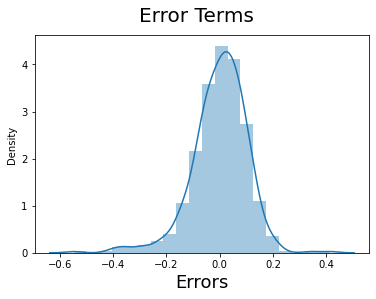

In [101]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


Observation:From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

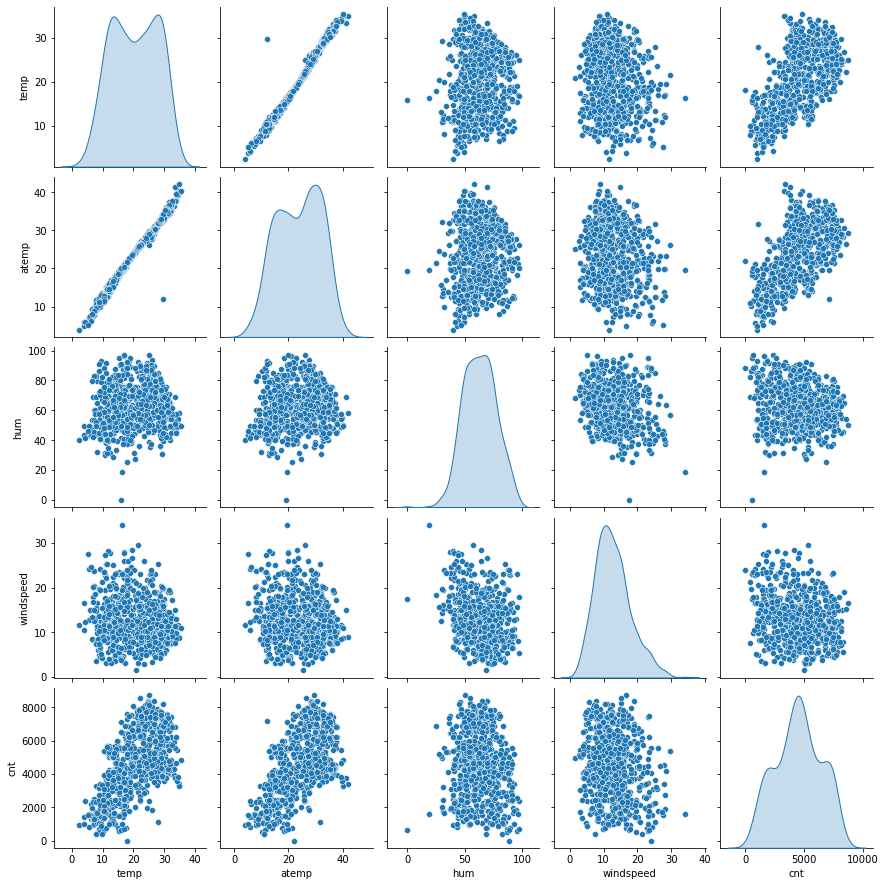

In [103]:
Bike_new=Bike_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(Bike_new, diag_kind='kde')
plt.show()

In [104]:
 #Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,windspeed,4.26
0,yr,1.95
14,weathersit_2,1.53
4,mnth_4,1.51
2,mnth_2,1.40
3,mnth_3,1.40
11,mnth_11,1.36
5,mnth_5,1.34
8,mnth_8,1.34
9,mnth_9,1.29


Observation:
    
    
From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

#Applying model on Test dataset

Applying the scaling on the test sets

In [106]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [107]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,0,0,...,0,0,0,0,0,0,0,0,0,0
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,1,0,...,0,0,0,0,0,0,0,1,0,0
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,0,1,...,0,0,0,0,0,0,0,0,0,0
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,1,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,0,0,...,0,1,0,1,0,0,0,0,1,0


In [108]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889,0.264840,0.246575,...,0.073059,0.105023,0.155251,0.146119,0.118721,0.173516,0.132420,0.127854,0.324201,0.036530
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953,0.442259,0.432005,...,0.260830,0.307285,0.362974,0.354034,0.324202,0.379560,0.339723,0.334692,0.469148,0.188034
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null   

In [110]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   windspeed     219 non-null    float64
 3   mnth_2        219 non-null    uint8  
 4   mnth_3        219 non-null    uint8  
 5   mnth_4        219 non-null    uint8  
 6   mnth_5        219 non-null    uint8  
 7   mnth_6        219 non-null    uint8  
 8   mnth_7        219 non-null    uint8  
 9   mnth_8        219 non-null    uint8  
 10  mnth_9        219 non-null    uint8  
 11  mnth_10       219 non-null    uint8  
 12  mnth_11       219 non-null    uint8  
 13  mnth_12       219 non-null    uint8  
 14  weekday_6     219 non-null    uint8  
 15  weathersit_2  219 non-null    uint8  
 16  weathersit_3  219 non-null    uint8  
dtypes: float64(2), int64(1), uint8(14)
memory usage: 9.8 KB


In [111]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)


### Model Evaluation

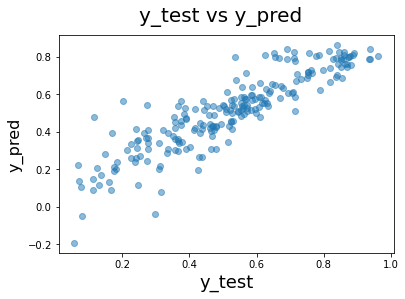

In [112]:
 #Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

### Adjusted R^2 Value for TEST

In [113]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

#r2=0.7898186421303428

0.7898186421303428